In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


## Objective

Develop a framework to evaluate the effectiveness of marketing strategies by conducting A/B testing on user engagement metrics such as click-through rates (CTR) and conversion rates.

## Step-1: Data Loading and cleaning

In [2]:
df_control_gp = pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv",sep=";")
df_test_gp = pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv",sep=";")

### Control group dataset

In [3]:
df_control_gp.shape

(30, 10)

In [4]:
df_control_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


#### Indentifying Null and missing values 

In [5]:
df_control_gp.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

#### Display rows with any Null values

In [6]:
df_control_gp[df_control_gp.isna().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As the row doesn't provide any useful data, we can drop it

In [7]:
df_control_gp.dropna(inplace=True)

In [8]:
df_control_gp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [9]:
df_control_gp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [10]:
df_control_gp['Date'] = pd.to_datetime(df_control_gp['Date'], format = "%d.%m.%Y")

In [11]:
df_control_gp['Date'].unique()

<DatetimeArray>
['2019-08-01 00:00:00', '2019-08-02 00:00:00', '2019-08-03 00:00:00',
 '2019-08-04 00:00:00', '2019-08-06 00:00:00', '2019-08-07 00:00:00',
 '2019-08-08 00:00:00', '2019-08-09 00:00:00', '2019-08-10 00:00:00',
 '2019-08-11 00:00:00', '2019-08-12 00:00:00', '2019-08-13 00:00:00',
 '2019-08-14 00:00:00', '2019-08-15 00:00:00', '2019-08-16 00:00:00',
 '2019-08-17 00:00:00', '2019-08-18 00:00:00', '2019-08-19 00:00:00',
 '2019-08-20 00:00:00', '2019-08-21 00:00:00', '2019-08-22 00:00:00',
 '2019-08-23 00:00:00', '2019-08-24 00:00:00', '2019-08-25 00:00:00',
 '2019-08-26 00:00:00', '2019-08-27 00:00:00', '2019-08-28 00:00:00',
 '2019-08-29 00:00:00', '2019-08-30 00:00:00']
Length: 29, dtype: datetime64[ns]

In [12]:
df_control_gp.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [13]:
df_control_gp.rename(columns={
    'Campaign Name': 'Campaign',
    'Date': 'Date',
    'Spend [USD]': 'Spend_USD',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'Views',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchases'
}, inplace=True)


In [14]:
df_control_gp.head()

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


### Adding CTR (Click-Through Rate) to measure the effectiveness of campaigns in driving clicks

In [15]:
df_control_gp['CTR_%'] = round(((df_control_gp['Website_Clicks']/df_control_gp['Impressions'])*100),2)

In [16]:
df_control_gp.head()

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases,CTR_%
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,8.48
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,6.70
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,4.94
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,4.21
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,3.69


### Test group dataset

In [17]:
df_test_gp.shape

(30, 10)

In [18]:
df_test_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [19]:
df_control_gp.isna().sum()

Campaign          0
Date              0
Spend_USD         0
Impressions       0
Reach             0
Website_Clicks    0
Searches          0
Views             0
Add_to_Cart       0
Purchases         0
CTR_%             0
dtype: int64

In [20]:
df_test_gp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


#### Converting date format

In [21]:
df_test_gp['Date'] = pd.to_datetime(df_test_gp['Date'], format = "%d.%m.%Y")

In [22]:
df_test_gp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [23]:
df_test_gp.rename(columns={
    'Campaign Name': 'Campaign',
    'Date': 'Date',
    'Spend [USD]': 'Spend_USD',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'Views',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchases'
}, inplace=True)


In [24]:
df_test_gp.head()

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


## Step-2: Data Exploration

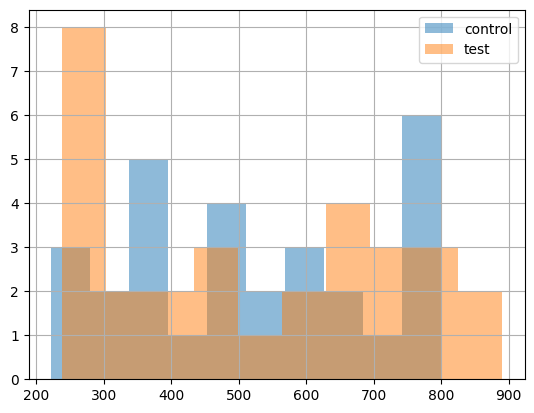

In [25]:
import matplotlib.pyplot as plt

df_control_gp['Purchases'].hist(alpha=0.5,label = "control")
df_test_gp['Purchases'].hist(alpha = 0.5, label = "test")
plt.legend()
plt.show()